In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import sklearn

In [2]:
df = pd.read_csv('spam_ham_dataset\\spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
df.dtypes

Unnamed: 0     int64
label         object
text          object
label_num      int64
dtype: object

In [4]:
df.shape


(5171, 4)

In [5]:
df.size

20684

In [6]:
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [7]:
df[df['label'] == 'spam'].head()

,Unnamed: 0,label,text,label_num
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
10,4922,spam,Subject: vocable % rnd - word asceticism\r\nvc...,1
11,3799,spam,Subject: report 01405 !\r\nwffur attion brom e...,1
13,3948,spam,Subject: vic . odin n ^ ow\r\nberne hotbox car...,1


In [8]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

### EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [10]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


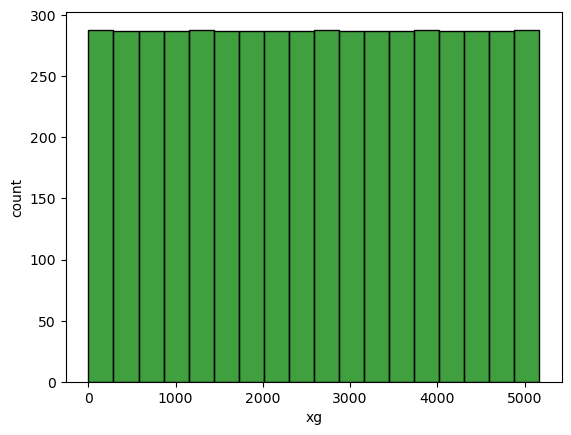

In [11]:
sns.histplot(df['Unnamed: 0'], color = 'green')
plt.xlabel('xg')
plt.ylabel('count')
plt.show()

In [12]:
df_copy = df.copy()

In [13]:
df_copy = df_copy.drop(columns = ['Unnamed: 0'])


In [14]:
df_copy.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [16]:
df_copy['text'].value_counts()

text
Subject: calpine daily gas nomination\r\n>\r\nricky a . archer\r\nfuel supply\r\n700 louisiana , suite 2700\r\nhouston , texas 77002\r\n713 - 830 - 8659 direct\r\n713 - 830 - 8722 fax\r\n- calpine daily gas nomination 1 . doc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [15]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thall\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thall\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thall\AppData\Roaming\nltk_data...


True